In [1]:
#Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split

# Linear regression specific
import sklearn 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
%matplotlib inline
import statistics as s

# KNN specific
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
sns.set()

#Logistic regression specific
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

CHANGE FOR OTHER DATASETS

In [2]:
#reading data - referenced as m_train and m_test
m_train = pd.read_csv('m_train2a.csv')
m_test = pd.read_csv('m_test2a.csv')

In [3]:
#reading data
m_t = pd.read_csv('matrix_topic.csv')
m_c = pd.read_csv('matrix_category.csv')

In [4]:
print(m_train.shape)
print(m_test.shape)

(44712, 1477)
(5224, 1477)


In [5]:
#Finding null values 
m_train.isnull().any().sum()

0

In [6]:
#Finding null values 
m_test.isnull().any().sum()

0

In [7]:
#Adding Category and Topics informations
m_test = pd.merge(m_test, m_c, on='document_id', how='left')
m_train = pd.merge(m_train, m_c, on='document_id', how='left')
m_test = pd.merge(m_test, m_t, on='document_id', how='left')
m_train = pd.merge(m_train, m_t, on='document_id', how='left')

In [8]:
print(m_train.shape)
print(m_test.shape)

(44712, 1845)
(5224, 1845)


In [9]:
#Deleting Unnecessary columns
m_test = m_test.drop(['display_id', 'document_id','timestamp'], axis=1)
m_train = m_train.drop(['display_id', 'document_id','timestamp'], axis=1)

In [10]:
# Final data to be sued for base models -
print(m_train.shape)
print(m_test.shape)
m_test.head()

(44712, 1842)
(5224, 1842)


,weekday,User_pageviews_unique,User_pageviews,doc_read_count,source_read_count,publisher_read_count,user_doc_read_count,user_source_read_count,user_publisher_read_count,clicked,...,290,291,292,293,294,295,296,297,298,299
0,0,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,26,26,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,46,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,46,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Splitting test further into validation and testing set
# For now 10% validation and 10% testing in order to maintain sequence
total = m_test.shape[0]
splitratio = 0.5
n = int(round((total * splitratio),0))

m_val = m_test[0:n]
m_test = m_test.iloc[n:] # testing data with 10% only

In [12]:
print(m_val.shape, m_test.shape)

(2612, 1842) (2612, 1842)


### SPLITTING DATA

In [13]:
#X-Y split 
y_train = m_train['clicked']
x_train = m_train.loc[:, m_train.columns != 'clicked']
y_val = m_val['clicked']
x_val = m_val.loc[:, m_val.columns != 'clicked']
y_test = m_test['clicked']
x_test = m_test.loc[:, m_test.columns != 'clicked']

In [14]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)
x_train.head()

(44712, 1841) (44712,) (2612, 1841) (2612,) (2612, 1841) (2612,)


,weekday,User_pageviews_unique,User_pageviews,doc_read_count,source_read_count,publisher_read_count,user_doc_read_count,user_source_read_count,user_publisher_read_count,uuid_1006f3f5197379,...,290,291,292,293,294,295,296,297,298,299
0,0,46,46,4.0,83.0,90.0,1.0,10.0,11.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,46,46,0.0,0.0,0.0,0.0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,46,46,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,46,46,0.0,0.0,0.0,0.0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,46,46,0.0,0.0,0.0,0.0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# a lot of nan in topic from 290 .... 291
x_train = x_train.fillna(0)
x_val = x_val.fillna(0)
x_test = x_test.fillna(0)
#Check
x_train.head()

,weekday,User_pageviews_unique,User_pageviews,doc_read_count,source_read_count,publisher_read_count,user_doc_read_count,user_source_read_count,user_publisher_read_count,uuid_1006f3f5197379,...,290,291,292,293,294,295,296,297,298,299
0,0,46,46,4.0,83.0,90.0,1.0,10.0,11.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,46,46,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,46,46,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,46,46,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,46,46,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### MODEL 1 - LINEAR REGRESSION - IGNORED 

In [20]:
# MLR
regressor = LinearRegression()  
regressor.fit(x_train1, y_train1)

In [21]:
#finding coefficients
coeff_mod1 = pd.DataFrame(regressor.coef_, x_train1.columns, columns=['Coefficient'])  
coeff_mod1

In [511]:
#Predictions on validation set 
y_predval1 = regressor.predict(x_val1)

In [512]:
#Adjusted R squared 
regressor.score(x_train1, y_train1)

0.28972023388663737

In [22]:
# Check the difference between the actual value and predicted value
diff = pd.DataFrame({'Actual on validation set': y_val1, 'Predicted': y_predval1})
diff.head()

In [485]:
# NOT REQUIRED - finding values above .99 in Predicted
den = len(y_predval1)
value = y_predval1 > 4.5
num = sum(value)

In [487]:
# NOT REQUIRED -checking
print("Number of instances's above 4.5:",num,"total :",den)

Number of instances's above 4.5: 0 total : 979


In [258]:
# NOT REQUIRED - finding values for 1 in Predicted
den1 = len(y_test1)
value1 = sum(y_test1)

In [259]:
# NOT REQUIRED -checking
print("Number of instances's for 1's:",value1,"total rows:",den1,"% of 1's", value1/den1)

Number of instances's for 1's: 366.0 total rows: 2136 % of 1's 0.17134831460674158


In [514]:
# Converting regression results into and clasiffication problem 
# and finding a optimal value of hyperparameter
hyperparamter = []
MSElist = []

for i in np.arange(0.1,10,0.1):
    i = round(i,1)
    hyperparamter.append(i)
    temp = 1*(y_predval1 >= i)
    x = s.mean(y_val1 != temp) 
    MSElist.append(x)

In [23]:
hyper_losstable = pd.DataFrame({'Hyperparamter': hyperparamter, 'Loss': MSElist})
hyper_losstable.head()

In [24]:
# gca stands for 'get current axis'
ax = plt.gca()
hyper_losstable.plot(kind='line',x='Hyperparamter',y='Loss',ax=ax)
plt.show()

In [519]:
#Minimum loss
minloss = hyper_losstable['Loss'].min()

In [520]:
# Finding index of hyperparameter
optimal_hyperparameter_index = int(hyper_losstable[['Loss']].idxmin())
# Finding hyperparameter
optimal_hyperparameter = hyper_losstable.iloc[optimal_hyperparameter_index].Hyperparamter

In [521]:
print('Loss for Linear Regression model on validation set:',minloss,'and optimal hyperparameter for this classification:',optimal_hyperparameter)

Loss for Linear Regression model on validation set: 0.1675178753830439 and optimal hyperparameter for this classification: 2.3


In [523]:
#Predictions on testing set
y_predtest1 = regressor.predict(x_test1)

In [537]:
y_pred1 = 1*(y_predtest1 >= optimal_hyperparameter)
loss = s.mean(y_test1 != y_pred1)

FINAL REGRESSION RESULT 

In [538]:
print('Loss for Linear Regression model on test set:',round(loss,3),'and optimal hyperparameter for this classification:',optimal_hyperparameter)

Loss for Linear Regression model on test set: 0.187 and optimal hyperparameter for this classification: 2.3


In [539]:
#reference
y_test1.value_counts()

0.0    796
1.0    183
Name: clicked, dtype: int64

In [144]:
#reference
ratio = 353/2057 # input values manually
print("ratio of clicked to unclicked:", ratio)

ratio of clicked to unclicked: 0.17160913952357804


#### MODEL 2 - CLASSIFICATION - IGNORED

FINDING ERROR USING METHOD 1 - KEEPING THIS ONLY - STANDARD WAY

In [25]:
#Finding optimal k value - loss found as mean of y_test != y_pred
k_values = []
loss_list = []

for i in range(1,30,2):
    k_values.append(i)
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_train1, y_train1)
    temp = knn.predict(x_val1)
    x = s.mean(y_val1 != temp)
    loss_list.append(x)
    #print(i)

In [26]:
k_losstable2 = pd.DataFrame({'K_Values': k_values, 'Loss': loss_list})
k_losstable2.head()

In [ ]:
# gca stands for 'get current axis'
ax = plt.gca()
k_losstable2.plot(kind='line',x='K_Values',y='Loss',ax=ax)
plt.show()

In [555]:
#Minimum loss
minloss2 = k_losstable2['Loss'].min()
minloss2

0.39938712972420837

In [556]:
# Finding index of optimal k
optimal_k_index = int(k_losstable2[['Loss']].idxmin())
# Finding k value 
optimal_k = k_losstable2.iloc[optimal_k_index].K_Values

In [564]:
print('Loss for classification model on validation set :',round(minloss2,3),'and optimal k value for this classification:',optimal_k)

Loss for classification model on validation set : 0.399 and optimal k value for this classification: 9.0


In [559]:
# testing on testing set
knn = KNeighborsClassifier(n_neighbors=int(optimal_k), metric='euclidean')
knn.fit(x_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [560]:
y_pred2 = knn.predict(x_test1)
loss = s.mean(y_test1 != y_pred2)

In [561]:
confusion_matrix(y_val1, y_pred2)

array([[389, 426],
       [ 79,  85]])

In [ ]:
FINAL CLASSIFICATION RESULT 

In [563]:
print('Loss for classification model on testing set :',round(loss,3),'and optimal k value for this classification:',optimal_k)

Loss for classification model on testing set : 0.509 and optimal k value for this classification: 9.0


FINDING ERROR USING METHOD 2 - IGNORED 

In [565]:
#Finding optimal k value - loss found as (F1 + F0)/(T0+F1+F0+T1)
k_values = []
loss_list = []

for i in range(1,30,2):
    k_values.append(i)
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_train1, y_train1)
    y_pred22 = knn.predict(x_test1)
    cm = confusion_matrix(y_test1, y_pred22)
    T0 = cm[0][0]
    F1 = cm[0][1]
    F0 = cm[1][0]
    T1 = cm[1][1]
    x = (F1 + F0)/(T0+F1+F0+T1) #loss
    loss_list.append(x)
    print(i)

In [566]:
k_losstable3 = pd.DataFrame({'K_Values': k_values, 'Loss': loss_list})
k_losstable3.head(30)

In [281]:
#Minimum loss
minloss3 = k_losstable3['Loss'].min()

In [282]:
# Finding index of optimal k
optimal_k_index = int(k_losstable3[['Loss']].idxmin())
# Finding k value 
optimal_k = k_losstable3.iloc[optimal_k_index].K_Values

In [283]:
print('Loss for classification model:',minloss3,'and optimal k value for this classification:',optimal_k)

Loss for classification model: 0.3947496353913466 and optimal k value for this classification: 1.0


### MODEL 3a - logistic regression - (L2 == Ridge Regression)

In [17]:
# Finding optimal value of c(inverse of lambda)
c_values = []
loss_list = []

for i in np.arange(0.01,20.5,0.5):
    i = round(i,2)
    logreg = LogisticRegression(C=i, multi_class='multinomial', max_iter=10000) #L1 is default
    logreg.fit(x_train, y_train)
    c_values.append(i)
    y_pred3a = logreg.predict(x_val)
    x = s.mean(y_val != y_pred3a)
    loss_list.append(x)
    print(i)

0.01
0.51
1.01
1.51
2.01
2.51
3.01
3.51
4.01
4.51
5.01
5.51
6.01
6.51
7.01
7.51
8.01
8.51
9.01
9.51
10.01
10.51
11.01
11.51
12.01
12.51
13.01
13.51
14.01
14.51
15.01
15.51
16.01
16.51
17.01
17.51
18.01
18.51
19.01
19.51
20.01


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
c_losstable3a = pd.DataFrame({'Lambda_inverse': c_values, 'Error': loss_list})
c_losstable3a.head(20)

,Lambda_inverse,Error
0,0.01,0.162328
1,0.51,0.160796
2,1.01,0.160796
3,1.51,0.160796
4,2.01,0.161179
5,2.51,0.160796
6,3.01,0.161179
7,3.51,0.161562
8,4.01,0.161562
9,4.51,0.162328


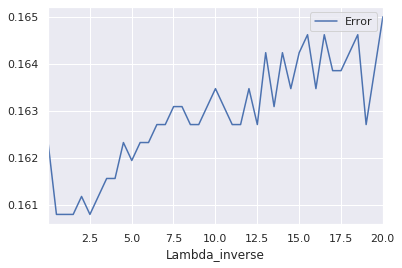

In [20]:
# gca stands for 'get current axis'
ax = plt.gca()
c_losstable3a.plot(kind='line',x='Lambda_inverse',y='Error',ax=ax)
plt.show()

In [21]:
#Minimum loss
minloss3a = c_losstable3a['Error'].min()

In [22]:
# Finding index of optimal c
optimal_c_index = int(c_losstable3a[['Error']].idxmin())
# Finding c value
optimal_c = c_losstable3a.iloc[optimal_c_index].Lambda_inverse

In [23]:
optimal_c

0.51

In [24]:
print('Error for Logistic regression on Validation set:',round(minloss3a,4),'and lambda value for this model:',round((1/optimal_c),4))


Error for Logistic regression on Validation set: 0.1608 and lambda value for this model: 1.9608


In [25]:
logreg = LogisticRegression(C=optimal_c, max_iter = 10000, multi_class='multinomial') #L1 is default
logreg.fit(x_train, y_train)

# if class is multinomial and solver is lbfgs then loss is crossentropy 

#penalty is l1,l2 or elastic net.

#The trade-off parameter of logistic regression that determines the strength of the regularization is called C, 
#and higher values of C correspond to less regularization (where we can specify the regularization function).
#C is actually the Inverse of regularization strength(lambda)#

LogisticRegression(C=0.51, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred3a = logreg.predict(x_test)
print('Accuracy of logistic regression classifier(L2 norm) on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier(L2 norm) on test set: 0.83


In [27]:
loss = s.mean(y_test != y_pred3a)

In [28]:
confusion_matrix3a = confusion_matrix(y_test, y_pred3a)
print(confusion_matrix3a)

[[2153   11]
 [ 423   25]]


In [29]:
print('Error for Logistic regression on test set:',round(loss,4),'and lambda value for this model:',round((1/optimal_c),4))



Error for Logistic regression on test set: 0.1662 and lambda value for this model: 1.9608


### MODEL 3b - logistic regression - (L1 is Lasso Regression)

In [ ]:
# Finding optimal value of c(inverse of lambda)
c_values = []
loss_list = []

for i in np.arange(0.01,20.5,0.5):
    i = round(i,2)
    logreg = LogisticRegression(C=i, penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000)
    logreg.fit(x_train, y_train)
    c_values.append(i)
    y_pred3b = logreg.predict(x_val)
    x = s.mean(y_val != y_pred3b)
    loss_list.append(x)
    print(i)

0.01
0.51
1.01


In [718]:
k_losstable3b = pd.DataFrame({'lambdaValues': lambda_values, 'Loss': loss_list})
k_losstable3b.head(30)

,lambdaValues,Loss
0,10,0.450460
1,12,0.450460
2,14,0.450460
3,16,0.448417
4,18,0.453524


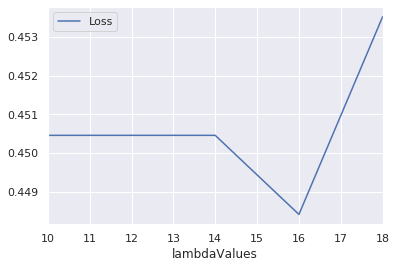

In [719]:
# gca stands for 'get current axis'
ax = plt.gca()
k_losstable3b.plot(kind='line',x='lambdaValues',y='Loss',ax=ax)
plt.show()

In [720]:
#Minimum loss
minloss3b = k_losstable3b['Loss'].min()

In [721]:
# Finding index of optimal lamdba
optimal_lambda_index = int(k_losstable3b[['Loss']].idxmin())
# Finding lambda value
optimal_lambda = k_losstable3b.iloc[optimal_lambda_index].lambdaValues

In [722]:
optimal_lambda

16.0

In [724]:
print('Loss for classification model on validation set:',round(minloss3b,3),'and optimal lambda value for this classification:',round((1/optimal_lambda),3))

Loss for classification model on validation set: 0.448 and optimal lambda value for this classification: 0.062


In [744]:
# Testing on testing set
# for cross entropy loss, multi_class='multinomial' and solver saga

logreg = LogisticRegression(C=optimal_lambda, penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000)
logreg.fit(x_train1, y_train1)

LogisticRegression(C=1.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [745]:
y_pred3b = logreg.predict(x_test1)
print('Accuracy of logistic regression classifier(L1 norm) on test set: {:.2f}'.format(logreg.score(x_test1, y_test1)))

Accuracy of logistic regression classifier(L1 norm) on test set: 0.43


In [746]:
minloss3b = s.mean(y_test1 != y_pred3b)

In [747]:
confusion_matrix3b = confusion_matrix(y_test1, y_pred3b)
print(confusion_matrix3b)

[[286 510]
 [ 47 136]]


In [748]:
print('Loss for classification model on validation set:',round(minloss3b,3),'and optimal lambda value for this classification:',round((1/optimal_lambda),3))

Loss for classification model on validation set: 0.569 and optimal lambda value for this classification: 0.062


### MODEL 3c - logistic regression - (Elastic net)

FOR TUNING lambda

In [631]:
# Finding optimal value of c(inverse of lambda). ALSO we can optimise l1 ratio
lambda_values = []
loss_list = []

for i in np.arange(0.1,5,0.4):
    i = round(i,1)
    logreg = LogisticRegression(C=i, penalty='elasticnet', solver='saga', l1_ratio = 0.5, multi_class='multinomial', max_iter = 500)
    logreg.fit(x_train1, y_train1)
    lambda_values.append(i)
    y_pred3c = logreg.predict(x_val1)
    x = s.mean(y_val1 != y_pred3c)
    loss_list.append(x)
    #print(i)

In [622]:
k_losstable3c = pd.DataFrame({'lambdaValues': lambda_values, 'Loss': loss_list})
k_losstable3c.head(30)

,lambdaValues,Loss
0,1.0,0.460674
1,1.4,0.462717
2,1.8,0.462717
3,2.2,0.466803
4,2.6,0.462717
5,3.0,0.461696
6,3.4,0.460674
7,3.8,0.460674


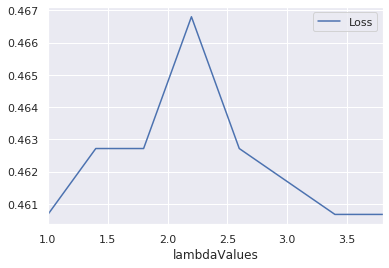

In [634]:
# gca stands for 'get current axis'
ax = plt.gca()
k_losstable3c.plot(kind='line',x='lambdaValues',y='Loss',ax=ax)
plt.show()

In [635]:
#Minimum loss
minloss3c = k_losstable3c['Loss'].min()

In [636]:
# Finding index of optimal lamdba
optimal_lambda_index = int(k_losstable3c[['Loss']].idxmin())
# Finding lambda value
optimal_lambda = k_losstable3c.iloc[optimal_lambda_index].lambdaValues

In [638]:
print('Loss for classification model on validation set:',round(minloss3c,3),'and optimal lambda value for this classification:',round((1/optimal_lambda),2))

Loss for classification model on validation set: 0.461 and optimal lambda value for this classification: 1.0


In [639]:
# Testing on test sets
logreg = LogisticRegression(C=optimal_lambda, penalty='elasticnet', solver='saga', l1_ratio = 0.5, multi_class='multinomial', max_iter = 500) #l1_ratio is how much l1/l2 penalty funtion
logreg.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [640]:
y_pred3c = logreg.predict(x_test1)
print('Accuracy of logistic regression classifier(Elastic net with ratio 0.5) on test set: {:.2f}'.format(logreg.score(x_test1, y_test1)))

Accuracy of logistic regression classifier(Elastic net with ratio 0.5) on test set: 0.43


In [641]:
minloss3c = s.mean(y_test1 != y_pred3c)

In [642]:
confusion_matrix3c = confusion_matrix(y_test1, y_pred3c)
print(confusion_matrix3c)

[[287 509]
 [ 47 136]]


In [643]:
print('Loss for classification model on test set:',round(minloss3c,3),'and optimal lambda value for this classification:',round((1/optimal_lambda),2))

Loss for classification model on test set: 0.568 and optimal lambda value for this classification: 1.0


FOR TUNING l1_ratio

In [750]:
# Finding optimal value  l1 ratio, taking lambda as average of what we get in Ridge and LASSO
c = 16.5
ratio_values = []
loss_list = []

for i in np.arange(0.1,1,0.1):
    i = round(i,1)
    logreg = LogisticRegression(C= c, penalty='elasticnet', solver='saga', l1_ratio = i, multi_class='multinomial', max_iter = 500)
    logreg.fit(x_train1, y_train1)
    ratio_values.append(i)
    y_pred3c = logreg.predict(x_val1)
    x = s.mean(y_val1 != y_pred3c)
    loss_list.append(x)
    print(i)

0.1
0.2
0.3
0.4
0.5
0.6


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8
0.9


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [752]:
k_losstable3c = pd.DataFrame({'Ratio': ratio_values, 'Loss': loss_list})
k_losstable3c.head(10)

,Ratio,Loss
0,0.1,0.445352
1,0.2,0.446374
2,0.3,0.446374
3,0.4,0.446374
4,0.5,0.446374
5,0.6,0.446374
6,0.7,0.446374
7,0.8,0.450460
8,0.9,0.450460


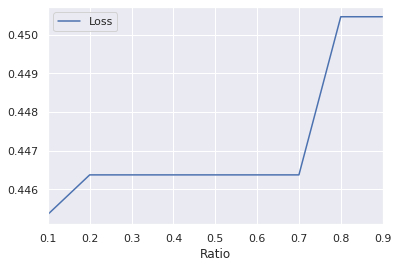

In [753]:
# gca stands for 'get current axis'
ax = plt.gca()
k_losstable3c.plot(kind='line',x='Ratio',y='Loss',ax=ax)
plt.show()

In [754]:
#Minimum loss
minloss3c = k_losstable3c['Loss'].min()

In [755]:
# Finding index of optimal lamdba
optimal_ratio_index = int(k_losstable3c[['Loss']].idxmin())
# Finding lambda value
optimal_ratio = k_losstable3c.iloc[optimal_ratio_index].Ratio

In [756]:
print('Loss for classification model on validation set:',round(minloss3c,3),'and optimal ratio value for this classification:',optimal_ratio )

Loss for classification model on validation set: 0.445 and optimal ratio value for this classification: 0.1


In [768]:
# Testing on test sets
logreg = LogisticRegression(C=c, penalty='elasticnet', solver='saga', l1_ratio = optimal_ratio, multi_class='multinomial', max_iter = 2000) #l1_ratio is how much l1/l2 penalty funtion
logreg.fit(x_train1, y_train1)

LogisticRegression(C=16.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.1, max_iter=2000,
                   multi_class='multinomial', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [773]:
y_pred3c = logreg.predict(x_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.43


In [774]:
minloss3c = s.mean(y_test1 != y_pred3c)

In [775]:
confusion_matrix3c = confusion_matrix(y_test1, y_pred3c)
print(confusion_matrix3c)

[[286 510]
 [ 44 139]]


In [776]:
print('Loss for classification model on test set:',round(minloss3c,3),'and optimal ratio value for this classification:',optimal_ratio)

Loss for classification model on test set: 0.566 and optimal ratio value for this classification: 0.1


### MODEL 4 - RANDOM FOREST 

In [ ]:
# can use accuarcy

# can tune n_estimators = number of trees
# max_depth = The maximum depth of the tree

# max_features = The number of features to consider when looking for the best split, 
#If “auto”, then max_features=sqrt(n_features)

In [812]:
trees = []
loss_list = []

for i in np.arange(10,500,50):
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(x_train1,y_train1)
    trees.append(i)
    y_pred4 = rfc.predict(x_val1)
    x = s.mean(y_val1 != y_pred4)
    loss_list.append(x)
    print(i)

10
60
110
160
210
260
310
360
410
460


In [796]:
k_losstable4 = pd.DataFrame({'Trees': trees, 'Loss': loss_list})
k_losstable3c.head(10)

,Ratio,Loss
0,0.1,0.445352
1,0.2,0.446374
2,0.3,0.446374
3,0.4,0.446374
4,0.5,0.446374
5,0.6,0.446374
6,0.7,0.446374
7,0.8,0.450460
8,0.9,0.450460


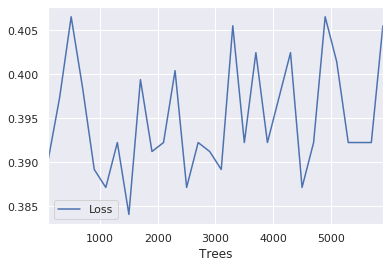

In [797]:
# gca stands for 'get current axis'
ax = plt.gca()
k_losstable4.plot(kind='line',x='Trees',y='Loss',ax=ax)
plt.show()

In [798]:
#Minimum loss
minloss4 = k_losstable4['Loss'].min()

In [799]:
# Finding index of optimal tree
optimal_tree_index = int(k_losstable4[['Loss']].idxmin())
# Finding tree optimal
optimal_tree = k_losstable4.iloc[optimal_tree_index].Trees

In [800]:
optimal_tree

1500.0

In [802]:
print('Loss for classification model on validation set:',round(minloss4,3),'and optimal trees for this classification:',optimal_tree)

Loss for classification model on validation set: 0.384 and optimal trees for this classification: 1500.0


In [790]:
# Testing on test sets
# random forest model creation
rfc = RandomForestClassifier(n_estimators=optimal_trees)
rfc.fit(x_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [803]:
# predictions
y_pred4 = rfc.predict(x_test1)

In [804]:
minloss4 = s.mean(y_test1 != y_pred4)

In [806]:
print('Loss for classification model on test set:',round(minloss4,3),'and optimal trees for this classification:',optimal_tree)

Loss for classification model on test set: 0.545 and optimal trees for this classification: 1500.0


In [807]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

In [811]:
max_depths

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])